In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

seaborn.set()

In [2]:
!ls

genderbasedmodel.csv     genderclassmodel.py      gendermodel.csv          kaggle_titanic_csv.ipynb myfirstforest.py         train.csv
genderclassmodel.csv     genderclassmodel_pd.csv  gendermodel.py           kaggle_titanic_pd.ipynb  test.csv


In [3]:
!head train.csv

In [4]:
import csv

with open('train.csv') as f:
    csv_file_object = csv.reader(f)
    header = next(csv_file_object)
    data = list(csv_file_object) # run through iterator
    data = np.array(data)

data

array([['1', '0', '3', ..., '7.25', '', 'S'],
       ['2', '1', '1', ..., '71.2833', 'C85', 'C'],
       ['3', '1', '3', ..., '7.925', '', 'S'],
       ..., 
       ['889', '0', '3', ..., '23.45', '', 'S'],
       ['890', '1', '1', ..., '30', 'C148', 'C'],
       ['891', '0', '3', ..., '7.75', '', 'Q']], 
      dtype='<U82')

-------
## using `pandas`...

In [5]:
df = pd.read_csv('train.csv', header=0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [6]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


-----
## data munging

In [10]:
df['Age'][0:10]

0    22
1    38
2    26
3    35
4    35
5   NaN
6    54
7     2
8    27
9    14
Name: Age, dtype: float64

In [11]:
df.Age[0:10]

0    22
1    38
2    26
3    35
4    35
5   NaN
6    54
7     2
8    27
9    14
Name: Age, dtype: float64

In [12]:
df['Age'].mean(), df['Age'].median()

(29.69911764705882, 28.0)

In [13]:
df[df['Age'] > 60]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [14]:
sub_df = df[df['Age'] > 60][['Sex', 'Pclass', 'Age', 'Survived']]
sub_df

,Sex,Pclass,Age,Survived
33,male,2,66.0,0
54,male,1,65.0,0
96,male,1,71.0,0
116,male,3,70.5,0
170,male,1,61.0,0
252,male,1,62.0,0
275,female,1,63.0,1
280,male,3,65.0,0
326,male,3,61.0,0
438,male,1,64.0,0


In [15]:
sub_df['Survived'].value_counts()

0    17
1     5
dtype: int64

### filter to show only null age values

In [16]:
df[df['Age'].isnull()][['Sex', 'Pclass', 'Age']]

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN
29,male,3,NaN
31,female,1,NaN
32,female,3,NaN
36,male,3,NaN
42,male,3,NaN


In [17]:
df['Pclass'].value_counts()

3    491
1    216
2    184
dtype: int64

In [18]:
# print numbers of passengers in each class

for i in range(1,4):
    print(i, len(df[(df['Pclass'] == i) & (df['Sex'] == 'male')]))

1 122
2 108
3 347


In [19]:
# a faster way...
df[df['Sex'] == 'male']['Pclass'].value_counts()

3    347
1    122
2    108
dtype: int64

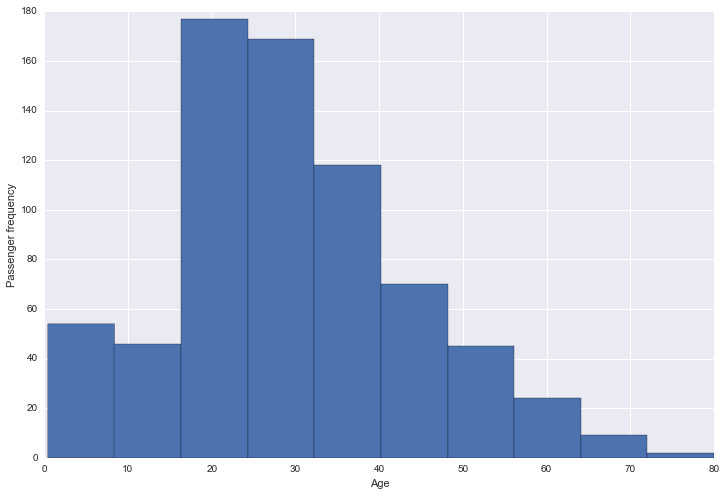

In [20]:
# age distribution of all passengers

ax = df['Age'].plot(kind='hist', figsize=(12,8))
ax.set_xlabel('Age')
ax.set_ylabel('Passenger frequency')

### drop na values and replot distribution

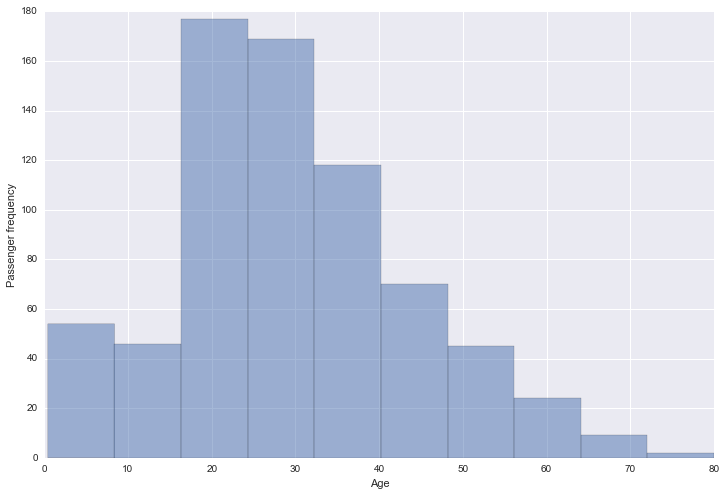

In [21]:
ax = df['Age'].dropna().plot(kind='hist', figsize=(12,8), alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Passenger frequency')

### data cleaning

In [22]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [23]:
df['Gender'] = df['Sex'].map(lambda x: x[0].upper())
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,F
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,F


In [24]:
# using a binary integer instead of one-character strings for Gender

df['Gender'] = df['Sex'].map(lambda x: 0 if x == 'female' else 1)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0


#### more concisely...

In [25]:
df['Gender'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0


#### for Embarked values...

In [26]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
dtype: int64

----------

## recreating `genderclassmodel.csv` using `pandas`

In [27]:
df.head() # train.csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1


In [28]:
fare_ceiling = 40
fare_bracket_size = 10
number_of_price_brackets = fare_ceiling//fare_bracket_size
number_of_classes = len(df['Pclass'].unique())

number_of_price_brackets, number_of_classes

(4, 3)

In [29]:
def bin_fare(fare):
    if fare <= 9:
        return 0
    elif fare <= 19:
        return 1
    elif fare <= 29:
        return 2
    else:
        return 3

df['BinFare'] = df['Fare'].map(bin_fare)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,BinFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,1,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,1,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,0,3


-----
### alternate way to bin values from a continuous variable (`pd.cut`)

In [30]:
df['BinFare'] = pd.cut(df['Fare'], [0,9,19,29,df['Fare'].max()], labels=[0,1,2,3], include_lowest=True)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,BinFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,1,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,1,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,0,3


### playing around with groupby on the binned values

In [31]:
fare_classes = df.groupby(df['BinFare']).mean()

In [32]:
fare_classes

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
BinFare,,,,,,,,
0,450.492013,0.198083,2.942492,28.354766,0.076677,0.028754,7.366918,0.821086
1,434.201031,0.386598,2.505155,28.073099,0.324742,0.237113,13.132259,0.587629
2,434.301471,0.463235,2.095588,30.318684,0.779412,0.713235,24.795587,0.544118
3,455.975806,0.572581,1.471774,32.001953,1.100806,0.758065,82.533249,0.532258


In [33]:
fare_classes2 = df.groupby(df['BinFare']).agg({'Age': [np.mean, np.median, np.size]})

In [34]:
fare_classes2['Age']

,mean,median,size
BinFare,,,
0,28.354766,25.5,313
1,28.073099,27.0,194
2,30.318684,31.5,136
3,32.001953,31.0,248


----------
### survival table

In [35]:
# example

# columns = Sex, Pclass, BinFare, ProbDeath

survival_df = pd.DataFrame(
            [{'Sex': 'male', 'Pclass': 1, 'BinFare': 3, 'ProbDeath': 0.2}, 
            {'Sex': 'male', 'Pclass': 1, 'BinFare': 3, 'ProbDeath': 0.5}]
    )

survival_df

,BinFare,Pclass,ProbDeath,Sex
0,3,1,0.2,male
1,3,1,0.5,male


In [36]:
df[df['BinFare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,BinFare


In [37]:
survival_data = []

for sex in ('male', 'female'):
    for pclass in df['Pclass'].unique():
        for binfare in df['BinFare'].unique():
            survived = df[(df['Sex'] == sex)
                          &(df['Pclass'] == pclass)
                          &(df['BinFare'] == binfare)]['Survived'].mean()
            survival_data.append({'Sex': sex,
                                 'Pclass': pclass,
                                 'BinFare': binfare,
                                 'Survived': survived})

survival_df = pd.DataFrame(survival_data)
survival_df.head()

,BinFare,Pclass,Sex,Survived
0,0,3,male,0.110204
1,3,3,male,0.206897
2,2,3,male,0.136364
3,1,3,male,0.215686
4,0,1,male,0.000000


In [38]:
# set p < 0.5 to 0, p >= 0.5 to 1

survival_df['Survived_yesno'] = survival_df['Survived'].map(lambda x: 1 if x>=0.5 else 0)
survival_df.head(20)

,BinFare,Pclass,Sex,Survived,Survived_yesno
0,0,3,male,0.110204,0
1,3,3,male,0.206897,0
2,2,3,male,0.136364,0
3,1,3,male,0.215686,0
4,0,1,male,0.000000,0
5,3,1,male,0.382022,0
6,2,1,male,0.407407,0
7,1,1,male,NaN,0
8,0,2,male,0.000000,0
9,3,2,male,0.214286,0


In [39]:
test_data = pd.read_csv('test.csv', header=0)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
# bin fares for test_data too

test_data['BinFare'] = pd.cut(test_data['Fare'], [0,9,19,29,test_data['Fare'].max()], labels=[0,1,2,3], include_lowest=True)
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BinFare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,2


In [41]:
test_predictions_df = test_data.merge(survival_df, on=['Sex', 'Pclass', 'BinFare'], how='left')
test_predictions_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BinFare,Survived,Survived_yesno
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.110204,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.625000,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0.158730,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.110204,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0.510638,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,1,0.215686,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0,0.625000,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,2,0.160000,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0,0.625000,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,2,0.136364,0


In [42]:
test_predictions_df.rename(columns={'Survived':'Survived_prob'}, inplace=True)
test_predictions_df.rename(columns={'Survived_yesno':'Survived'}, inplace=True)
test_predictions_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BinFare,Survived_prob,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.110204,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.625000,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0.158730,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.110204,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0.510638,1


In [43]:
test_predictions_df['Survived'] = test_predictions_df['Survived'].fillna(0).astype(int)
test_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId      418 non-null int64
Pclass           418 non-null int64
Name             418 non-null object
Sex              418 non-null object
Age              332 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Ticket           418 non-null object
Fare             417 non-null float64
Cabin            91 non-null object
Embarked         418 non-null object
BinFare          417 non-null float64
Survived_prob    417 non-null float64
Survived         418 non-null int64
dtypes: float64(4), int64(5), object(5)
memory usage: 49.0+ KB


In [44]:
test_predictions_df[['PassengerId', 'Survived']].to_csv('genderclassmodel_pd.csv', index=False)